In [1]:
import numpy as np 
import pandas as pd 
import os
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier as rf
import pandas_profiling
from sklearn.feature_selection import mutual_info_classif
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
from prettytable import PrettyTable
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.model_selection import RandomizedSearchCV

In [2]:
df=pd.read_csv('../input/how-natural-disasters-impact-regions-labor-market/louisana_clean_emp_with_shock_info.csv')
df.head()

Unnamed: 0  area_fips  year  qtr  qtrly_estabs  month1_emplvl  \
0         383      22063  2003    4          1400          17866   
1         346      22045  2003    3          1803          30620   
2         345      22045  2003    2          1810          29598   
3         344      22045  2003    1          1805          29188   
4         343      22043  2003    4           221           3145   

   month2_emplvl  month3_emplvl  total_qtrly_wages  qtr_emp  affected_county  \
0          17697          17696          110988687    53259                1   
1          30973          31483          223175185    93076                1   
2          29863          30518          219521478    89979                1   
3          29038          28976          210096622    87202                1   
4           3165           3214           21520968     9524                0   

   after_2005Q3  affected_county_after_shock  
0             0                            0  
1             0                            0  
2             0                            0  
3             0                            0  
4             0                            0

In [3]:
df.shape

(1280, 13)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1280 entries, 0 to 1279
Data columns (total 13 columns):
 #   Column                       Non-Null Count  Dtype
---  ------                       --------------  -----
 0   Unnamed: 0                   1280 non-null   int64
 1   area_fips                    1280 non-null   int64
 2   year                         1280 non-null   int64
 3   qtr                          1280 non-null   int64
 4   qtrly_estabs                 1280 non-null   int64
 5   month1_emplvl                1280 non-null   int64
 6   month2_emplvl                1280 non-null   int64
 7   month3_emplvl                1280 non-null   int64
 8   total_qtrly_wages            1280 non-null   int64
 9   qtr_emp                      1280 non-null   int64
 10  affected_county              1280 non-null   int64
 11  after_2005Q3                 1280 non-null   int64
 12  affected_county_after_shock  1280 non-null   int64
dtypes: int64(13)
memory usage: 130.1 KB


In [5]:
df=df.drop(['Unnamed: 0'],axis=1)

In [6]:
df.describe().T

count          mean           std        min  \
area_fips                    1280.0  2.206400e+04  3.696035e+01    22001.0   
year                         1280.0  2.005000e+03  1.414766e+00     2003.0   
qtr                          1280.0  2.500000e+00  1.118471e+00        1.0   
qtrly_estabs                 1280.0  1.828527e+03  2.991902e+03      104.0   
month1_emplvl                1280.0  2.864588e+04  5.002418e+04     1354.0   
month2_emplvl                1280.0  2.881757e+04  5.036739e+04     1370.0   
month3_emplvl                1280.0  2.889932e+04  5.034095e+04     1380.0   
total_qtrly_wages            1280.0  2.457834e+08  4.626923e+08  7501555.0   
qtr_emp                      1280.0  8.636277e+04  1.506886e+05     4113.0   
affected_county              1280.0  3.125000e-01  4.636936e-01        0.0   
after_2005Q3                 1280.0  4.500000e-01  4.976882e-01        0.0   
affected_county_after_shock  1280.0  1.406250e-01  3.477702e-01        0.0   

                                     25%         50%           75%  \
area_fips                       22032.50     22064.0  2.209550e+04   
year                             2004.00      2005.0  2.006000e+03   
qtr                                 1.75         2.5  3.250000e+00   
qtrly_estabs                      336.00       688.0  1.718250e+03   
month1_emplvl                    5184.75      9964.5  2.478475e+04   
month2_emplvl                    5173.75      9988.5  2.479800e+04   
month3_emplvl                    5195.25     10034.5  2.499300e+04   
total_qtrly_wages            32236254.25  67993405.0  2.222506e+08   
qtr_emp                         15588.25     29971.0  7.450800e+04   
affected_county                     0.00         0.0  1.000000e+00   
after_2005Q3                        0.00         0.0  1.000000e+00   
affected_county_after_shock         0.00         0.0  0.000000e+00   

                                      max  
area_fips                    2.212700e+04  
year                         2.007000e+03  
qtr                          4.000000e+00  
qtrly_estabs                 1.445800e+04  
month1_emplvl                2.660550e+05  
month2_emplvl                2.675690e+05  
month3_emplvl                2.687750e+05  
total_qtrly_wages            2.821206e+09  
qtr_emp                      8.023990e+05  
affected_county              1.000000e+00  
after_2005Q3                 1.000000e+00  
affected_county_after_shock  1.000000e+00

In [7]:
df.isnull().sum()

area_fips                      0
year                           0
qtr                            0
qtrly_estabs                   0
month1_emplvl                  0
month2_emplvl                  0
month3_emplvl                  0
total_qtrly_wages              0
qtr_emp                        0
affected_county                0
after_2005Q3                   0
affected_county_after_shock    0
dtype: int64

In [8]:
df.duplicated().sum()

0

In [9]:
df.profile_report()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [10]:
cor=df.corr()
plt.figure(figsize=(10,6))
sns.heatmap(cor,annot=True)

<AxesSubplot:>

In [11]:
X = df.drop('affected_county_after_shock', axis=1)
y = df['affected_county_after_shock']
selector = SelectFromModel(rf(n_estimators=100, random_state=0))
selector.fit(X, y)
support = selector.get_support()
features = X.loc[:,support].columns.tolist()
print(features)
print(rf(n_estimators=100, random_state=0).fit(X,y).feature_importances_)

['year', 'affected_county', 'after_2005Q3']
[0.02459791 0.13989152 0.00659485 0.05589401 0.01635113 0.03116051
 0.03143933 0.05319663 0.0198198  0.363188   0.25786631]


In [12]:
importances=mutual_info_classif(X,y)
feat_importances=pd.Series(importances,df.columns[0:len(df.columns)-1])
feat_importances.plot(kind='barh',color='teal')
plt.show()

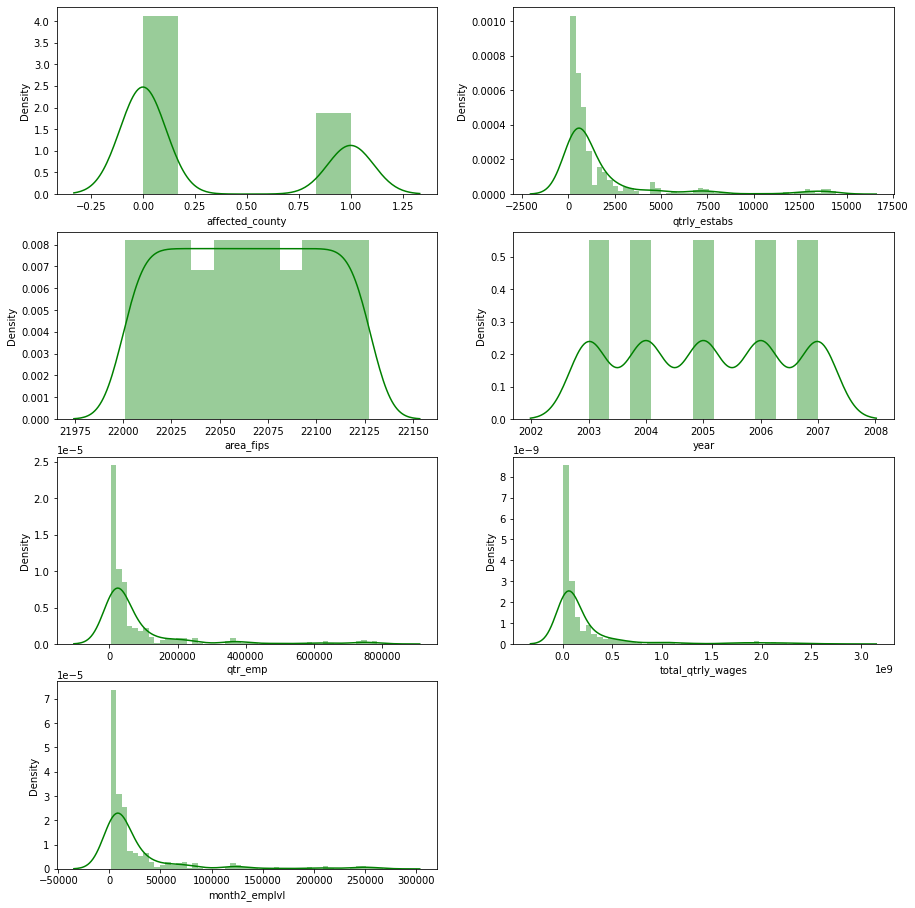

In [13]:
distplot_df=df.loc[:,['affected_county','qtrly_estabs' ,'area_fips','year','qtr_emp','total_qtrly_wages','month2_emplvl' ]]

fig = plt.figure(figsize=(15, 20))
for i, column in enumerate(distplot_df.columns, 1):
    f=plt.subplot(5,2,i)
    sns.distplot(distplot_df[column], color="green",fit_kws={"color":"darkgreen"});

In [14]:
def distripution(feature): 
    sns.histplot(df, x=feature,color=sns.color_palette()[4]);
    plt.title("Distribution Of The"+ feature +"Feature",fontsize=15,loc="center",fontweight=10, fontstyle='italic')
    plt.ylabel("Frequency",fontsize=12.5)
    plt.xlabel(feature,fontsize=12.5)

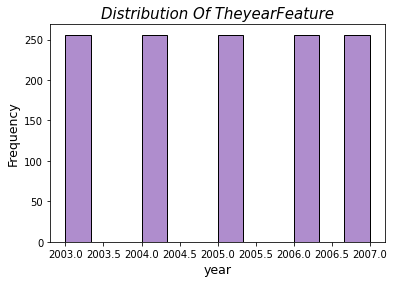

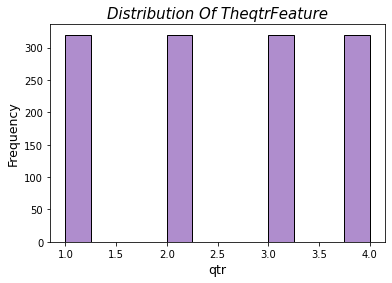

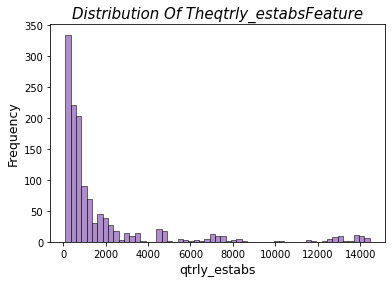

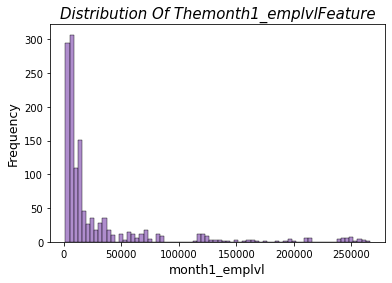

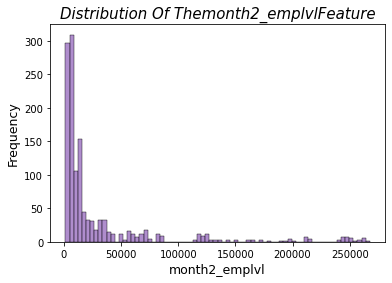

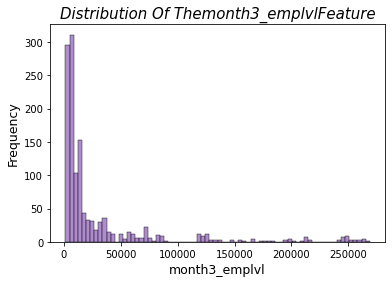

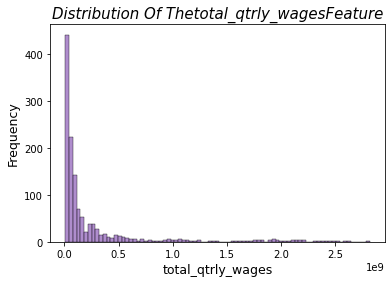

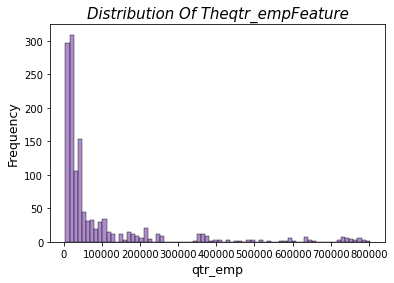

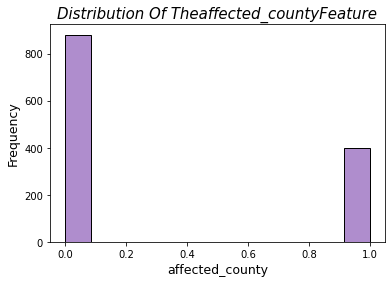

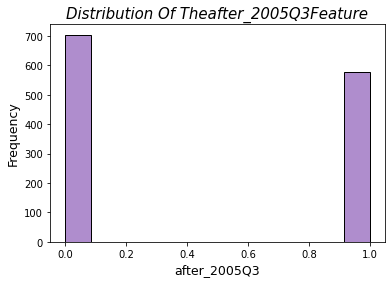

In [15]:
for  i in df.columns[:-1]: 
    distripution(i)
    plt.show()

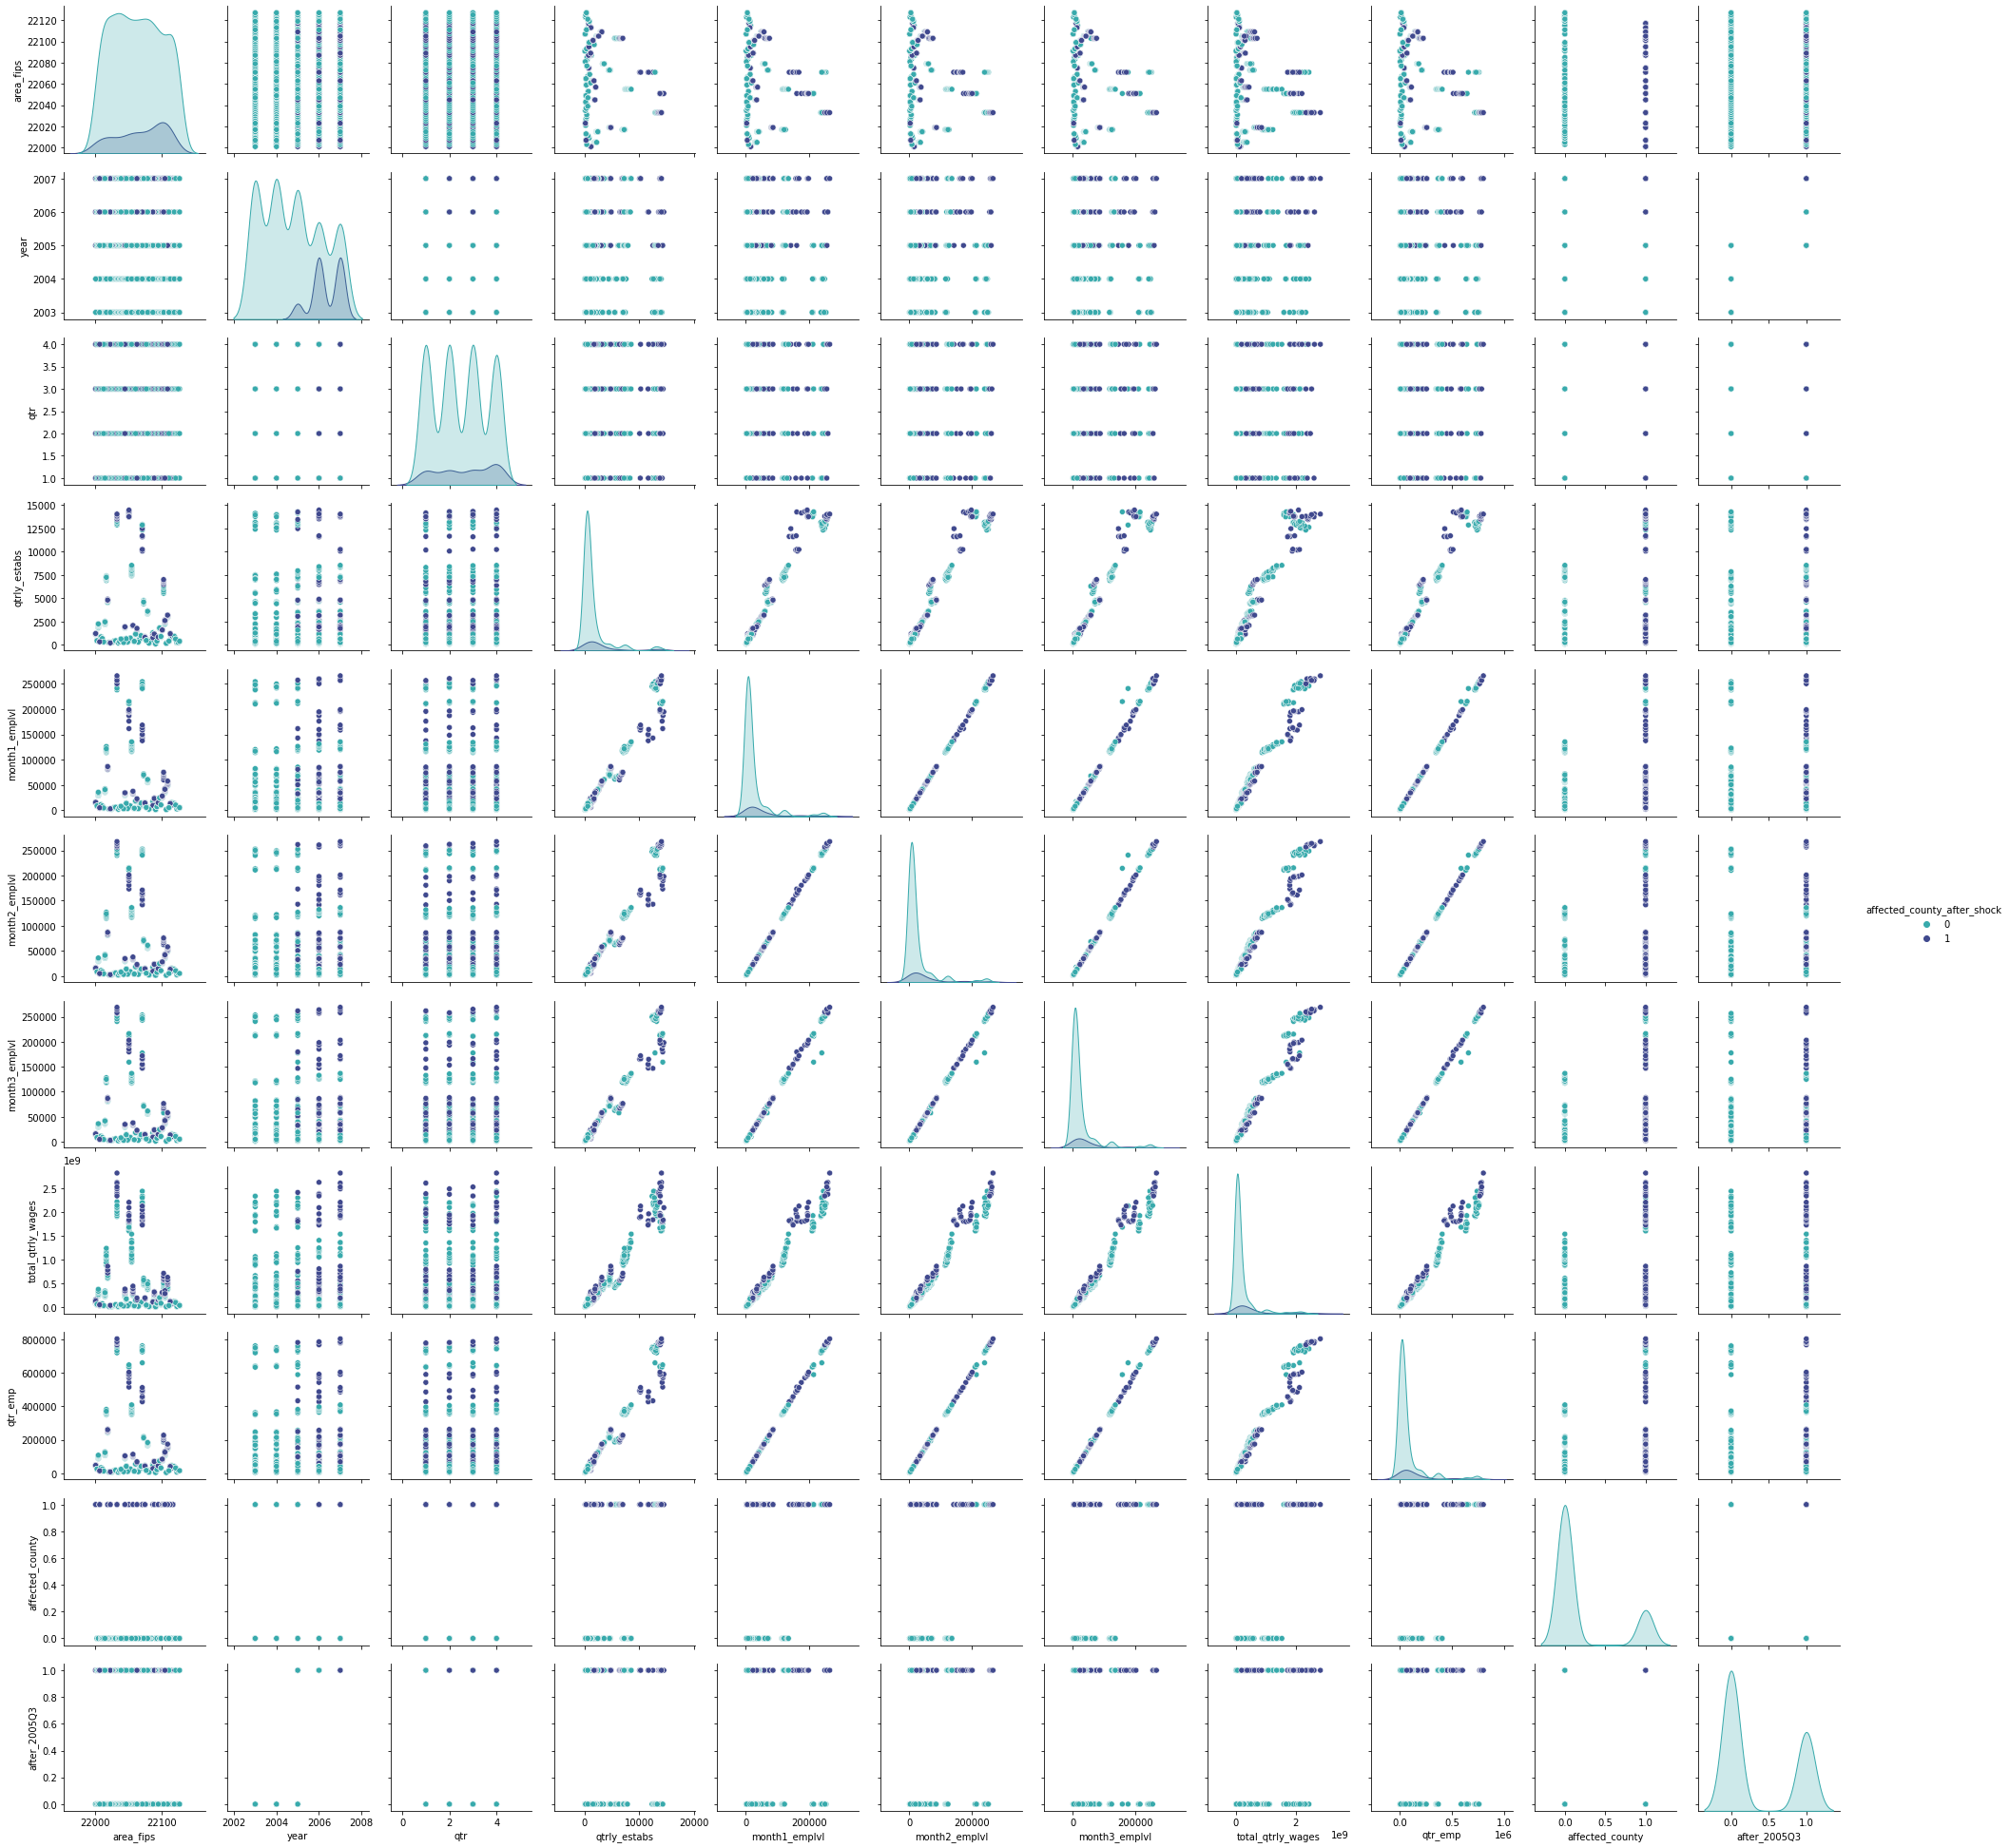

In [16]:
sns.pairplot(df,hue='affected_county_after_shock',palette="mako_r");

In [17]:
x_predictor_col = ['affected_county','qtrly_estabs' ,'area_fips','year','qtr_emp','total_qtrly_wages','month2_emplvl']

<AxesSubplot:xlabel='affected_county_after_shock', ylabel='qtrly_estabs'>

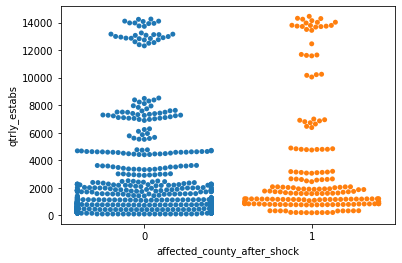

In [18]:
sns.swarmplot(x=y, y= df['qtrly_estabs'])

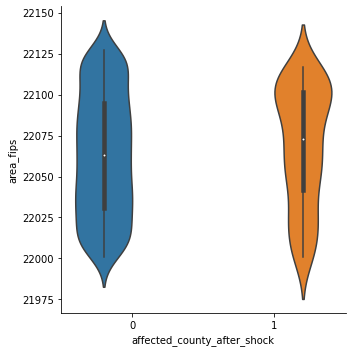

In [19]:
sns.catplot(
    data=df, x="affected_county_after_shock", y="area_fips", hue="affected_county_after_shock", kind="violin",
)

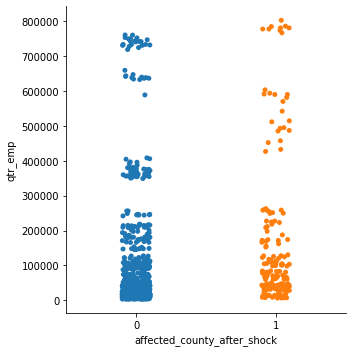

In [20]:
g = sns.catplot(
    data=df,
    x="affected_county_after_shock", y="qtr_emp", hue="affected_county_after_shock",
    height=5)

<AxesSubplot:xlabel='affected_county_after_shock', ylabel='total_qtrly_wages'>

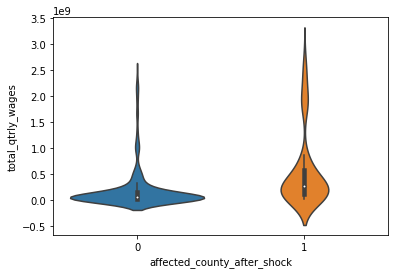

In [21]:
sns.violinplot(y = df['total_qtrly_wages'], x = df['affected_county_after_shock'])

<AxesSubplot:xlabel='year', ylabel='count'>

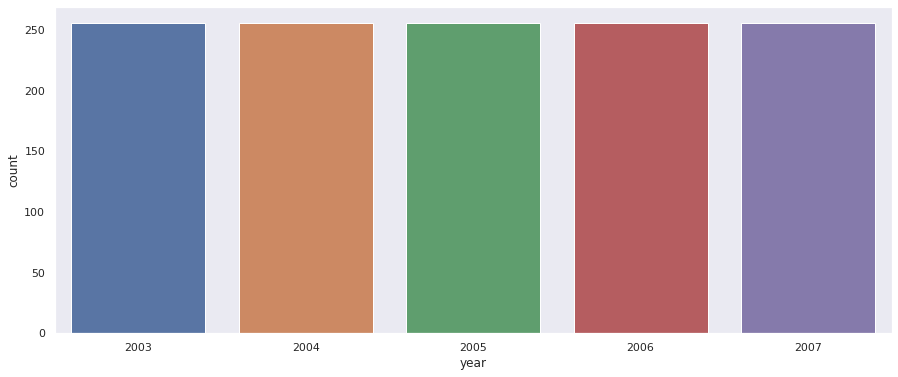

In [22]:
plt.figure(figsize=(15 ,6 ))
sns.set(style='dark')
sns.countplot(data = df , x = df['year'] , order=df['year'].value_counts().index[0:14]) 

<AxesSubplot:xlabel='month2_emplvl', ylabel='count'>

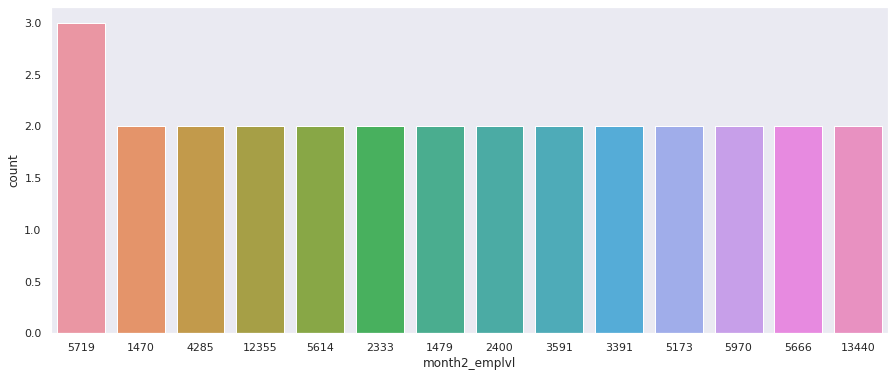

In [23]:
plt.figure(figsize=(15 ,6 ))
sns.set(style='dark')
sns.countplot(data = df , x = df['month2_emplvl'] , order=df['month2_emplvl'].value_counts().index[0:14]) 

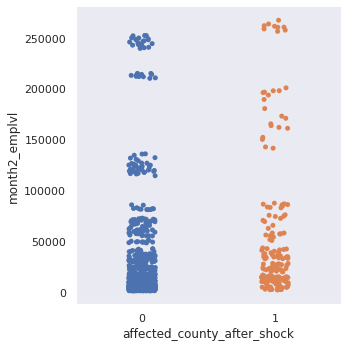

In [24]:
g = sns.catplot(
    data=df,
    x="affected_county_after_shock", y="month2_emplvl", hue="affected_county_after_shock",
    height=5)

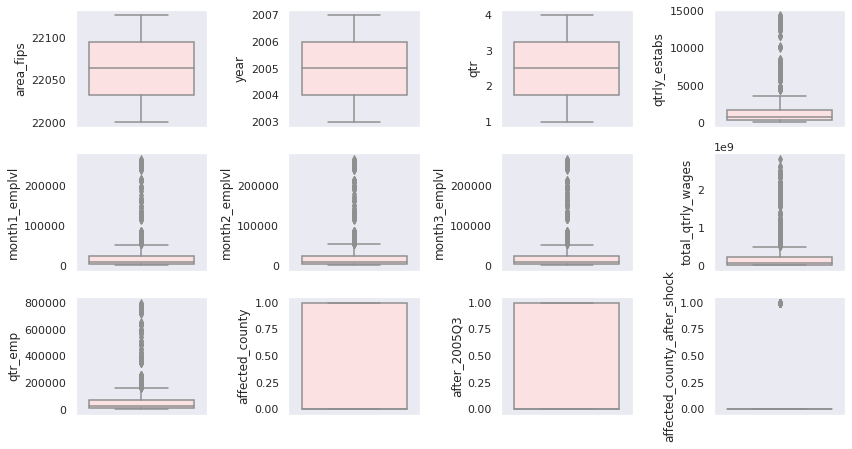

In [25]:
fig = plt.figure(figsize=(12,18))
for i in range(len(df.columns)):
    fig.add_subplot(9,4,i+1)
    sns.boxplot(y=df.iloc[:,i],color="#FFDDDD")

plt.tight_layout()
plt.show()

In [26]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

area_fips                      6.300000e+01
year                           2.000000e+00
qtr                            1.500000e+00
qtrly_estabs                   1.382250e+03
month1_emplvl                  1.960000e+04
month2_emplvl                  1.962425e+04
month3_emplvl                  1.979775e+04
total_qtrly_wages              1.900143e+08
qtr_emp                        5.891975e+04
affected_county                1.000000e+00
after_2005Q3                   1.000000e+00
affected_county_after_shock    0.000000e+00
dtype: float64


In [27]:
from collections import Counter
def detect_outliers(df,features):
    outlier_indices=[]
    
    for c in features:
        Q1=np.percentile(df[c],25)
        
        Q3=np.percentile(df[c],75)
        
        IQR= Q3-Q1
        
        outlier_step= IQR * 1.5
        
        outlier_list_col = df[(df[c]< Q1 - outlier_step)|( df[c] > Q3 + outlier_step)].index
        
        outlier_indices.extend(outlier_list_col)
    
    outliers_indices = Counter(outlier_indices)
    multiple_outliers = list(i for i , v in outliers_indices.items() if v>2 )
    return multiple_outliers

In [28]:
df.columns

Index(['area_fips', 'year', 'qtr', 'qtrly_estabs', 'month1_emplvl',
       'month2_emplvl', 'month3_emplvl', 'total_qtrly_wages', 'qtr_emp',
       'affected_county', 'after_2005Q3', 'affected_county_after_shock'],
      dtype='object')

In [29]:
df= df.drop(detect_outliers(df,['area_fips', 'year', 'qtr', 'qtrly_estabs', 'month1_emplvl',
       'month2_emplvl', 'month3_emplvl', 'total_qtrly_wages', 'qtr_emp',
       'affected_county', 'after_2005Q3', 'affected_county_after_shock']),axis = 0).reset_index(drop = True)

In [30]:
df['affected_county_after_shock'].value_counts()

0    965
1    129
Name: affected_county_after_shock, dtype: int64

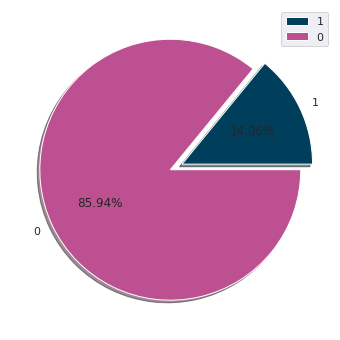

In [31]:
plt.figure(figsize= (10, 6))
data_pie  = [180 , 1100]
labels = ["1", "0"]
explode = [0.1, 0]
plt.pie(data_pie ,labels= labels , explode = explode , autopct="%1.2f%%", shadow= True, colors= ['#003f5c', '#bc5090'])
plt.legend()
plt.show()

In [32]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

In [33]:
X_train.shape

(896, 11)

In [34]:
report= PrettyTable()
report.field_names=['Model name','Accuracy Score','Precision Score','Recall Score','F1_score','Cohen Kappa Score']


classifier=['LogisticRegression','KNN','DecisionTreeClassifier','RandomForestClassifier']
accuracy=[]
precision=[]
recall=[]
f1_score=[]
kappa=[]

for i in classifier:
    if i=='LogisticRegression':
        model1=LogisticRegression()
        model1.fit(X_train,y_train)
        log_pred=pd.DataFrame(model1.predict(X_test))
        report.add_row([i,
                    metrics.accuracy_score(y_test,log_pred),
                    metrics.precision_score(y_test,log_pred,average='weighted'),
                    metrics.recall_score(y_test,log_pred,average='weighted'),
                    metrics.f1_score(y_test,log_pred,average='weighted'),
                    metrics.cohen_kappa_score(y_test,log_pred)])
        
    elif i=='KNN': 
        model2=KNeighborsClassifier()
        model2.fit(X_train,y_train)
        knn_pred=model2.predict(X_test)
        report.add_row([i,
                    metrics.accuracy_score(y_test,knn_pred),
                    metrics.precision_score(y_test,knn_pred,average='weighted'),
                    metrics.recall_score(y_test,knn_pred,average='weighted'),
                    metrics.f1_score(y_test,knn_pred,average='weighted'),
                    metrics.cohen_kappa_score(y_test,log_pred)])
        
    elif i=='DecisionTreeClassifier':
        model3=DecisionTreeClassifier()
        model3.fit(X_train,y_train)
        dec_pred=model3.predict(X_test)
        report.add_row([i,
                    metrics.accuracy_score(y_test,dec_pred),
                    metrics.precision_score(y_test,dec_pred,average='weighted'),
                    metrics.recall_score(y_test,dec_pred,average='weighted'),
                    metrics.f1_score(y_test,dec_pred,average='weighted'),
                    metrics.cohen_kappa_score(y_test,log_pred)])
        
    elif i=='RandomForestClassifier':
        model4=RandomForestClassifier()
        model4.fit(X_train,y_train)
        random_pred=model4.predict(X_test)
        #Evaluation metrics
        report.add_row([i,
                    metrics.accuracy_score(y_test,random_pred),
                    metrics.precision_score(y_test,random_pred,average='weighted'),
                    metrics.recall_score(y_test,random_pred,average='weighted'),
                    metrics.f1_score(y_test,random_pred,average='weighted'),
                    metrics.cohen_kappa_score(y_test,log_pred)])
print(report)

+------------------------+--------------------+--------------------+--------------------+--------------------+---------------------+
|       Model name       |   Accuracy Score   |  Precision Score   |    Recall Score    |      F1_score      |  Cohen Kappa Score  |
+------------------------+--------------------+--------------------+--------------------+--------------------+---------------------+
|   LogisticRegression   | 0.8776041666666666 | 0.8493475430253623 | 0.8776041666666666 | 0.849407188058504  | 0.22845417236662113 |
|          KNN           | 0.8619791666666666 | 0.8439447654061625 | 0.8619791666666666 | 0.8510185816257732 | 0.22845417236662113 |
| DecisionTreeClassifier |        1.0         |        1.0         |        1.0         |        1.0         | 0.22845417236662113 |
| RandomForestClassifier |        1.0         |        1.0         |        1.0         |        1.0         | 0.22845417236662113 |
+------------------------+--------------------+--------------------+-

In [35]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=33)
X_sm, y_sm = sm.fit_resample(X,y)

<AxesSubplot:xlabel='affected_county_after_shock', ylabel='count'>

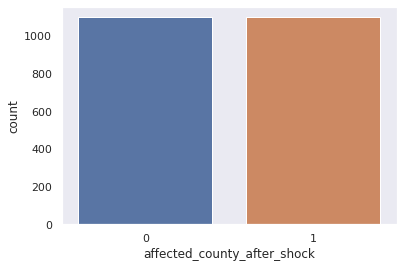

In [36]:
sns.countplot(y_sm)

In [37]:
X_sm_train, X_sm_test, y_sm_train, y_sm_test = train_test_split(X_sm,y_sm,test_size=0.3,random_state=2)

In [38]:
report= PrettyTable()
report.field_names=['Model name','Accuracy Score','Precision Score','Recall Score','F1_score','Cohen Kappa Score']


classifier=['LogisticRegression','KNN','DecisionTreeClassifier','RandomForestClassifier']
accuracy=[]
precision=[]
recall=[]
f1_score=[]
kappa=[]

for i in classifier:
    if i=='LogisticRegression':
        model1=LogisticRegression()
        model1.fit(X_sm_train,y_sm_train)
        log_pred=pd.DataFrame(model1.predict(X_sm_test))
        report.add_row([i,
                    metrics.accuracy_score(y_sm_test,log_pred),
                    metrics.precision_score(y_sm_test,log_pred,average='weighted'),
                    metrics.recall_score(y_sm_test,log_pred,average='weighted'),
                    metrics.f1_score(y_sm_test,log_pred,average='weighted'),
                    metrics.cohen_kappa_score(y_sm_test,log_pred)])
        
    elif i=='KNN': 
        model2=KNeighborsClassifier()
        model2.fit(X_sm_train,y_sm_train)
        knn_pred=model2.predict(X_sm_test)
        report.add_row([i,
                    metrics.accuracy_score(y_sm_test,knn_pred),
                    metrics.precision_score(y_sm_test,knn_pred,average='weighted'),
                    metrics.recall_score(y_sm_test,knn_pred,average='weighted'),
                    metrics.f1_score(y_sm_test,knn_pred,average='weighted'),
                    metrics.cohen_kappa_score(y_sm_test,log_pred)])
        
    elif i=='DecisionTreeClassifier':
        model3=DecisionTreeClassifier()
        model3.fit(X_sm_train,y_sm_train)
        dec_pred=model3.predict(X_sm_test)
        report.add_row([i,
                    metrics.accuracy_score(y_sm_test,dec_pred),
                    metrics.precision_score(y_sm_test,dec_pred,average='weighted'),
                    metrics.recall_score(y_sm_test,dec_pred,average='weighted'),
                    metrics.f1_score(y_sm_test,dec_pred,average='weighted'),
                    metrics.cohen_kappa_score(y_sm_test,log_pred)])
        
    elif i=='RandomForestClassifier':
        model4=RandomForestClassifier()
        model4.fit(X_sm_train,y_sm_train)
        random_pred=model4.predict(X_sm_test)
        report.add_row([i,
                    metrics.accuracy_score(y_sm_test,random_pred),
                    metrics.precision_score(y_sm_test,random_pred,average='weighted'),
                    metrics.recall_score(y_sm_test,random_pred,average='weighted'),
                    metrics.f1_score(y_sm_test,random_pred,average='weighted'),
                    metrics.cohen_kappa_score(y_sm_test,log_pred)])
print(report)

+------------------------+--------------------+--------------------+--------------------+--------------------+-------------------+
|       Model name       |   Accuracy Score   |  Precision Score   |    Recall Score    |      F1_score      | Cohen Kappa Score |
+------------------------+--------------------+--------------------+--------------------+--------------------+-------------------+
|   LogisticRegression   | 0.5181818181818182 | 0.2685123966942149 | 0.5181818181818182 | 0.3537289058247142 |        0.0        |
|          KNN           | 0.7848484848484848 | 0.7856008856008857 | 0.7848484848484848 | 0.7843461979513138 |        0.0        |
| DecisionTreeClassifier |        1.0         |        1.0         |        1.0         |        1.0         |        0.0        |
| RandomForestClassifier |        1.0         |        1.0         |        1.0         |        1.0         |        0.0        |
+------------------------+--------------------+--------------------+---------------

In [39]:
y_sm.value_counts()

0    1100
1    1100
Name: affected_county_after_shock, dtype: int64

In [40]:
from sklearn.utils import resample
df_majority = df[(df['affected_county_after_shock']==0)] 
df_minority = df[(df['affected_county_after_shock']==1)] 
df_minority_upsampled = resample(df_minority, 
                                 replace=True,    
                                 n_samples= 1100, 
                                 random_state=42)  
df_upsampled = pd.concat([df_minority_upsampled, df_majority])

In [41]:
xres=df_upsampled.drop('affected_county_after_shock', axis=1)
yres = df_upsampled['affected_county_after_shock']

In [42]:
df_upsampled['affected_county_after_shock'].value_counts()

1    1100
0     965
Name: affected_county_after_shock, dtype: int64

<AxesSubplot:xlabel='affected_county_after_shock', ylabel='count'>

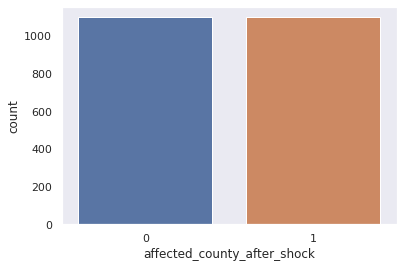

In [43]:
sns.countplot(y_sm)

In [44]:
xres_train, xres_test, yres_train, yres_test = train_test_split(xres,yres,test_size=0.3,random_state=2)

In [45]:
df_upsampled.shape

(2065, 12)

In [46]:
xres_train.shape

(1445, 11)

In [47]:
report= PrettyTable()
report.field_names=['Model name','Accuracy Score','Precision Score','Recall Score','F1_score','Cohen Kappa Score']


classifier=['LogisticRegression','KNN','DecisionTreeClassifier','RandomForestClassifier']
accuracy=[]
precision=[]
recall=[]
f1_score=[]
kappa=[]

for i in classifier:
    if i=='LogisticRegression':
        model1=LogisticRegression()
        model1.fit(xres_train,yres_train)
        log_pred=pd.DataFrame(model1.predict(xres_test))
        report.add_row([i,
                    metrics.accuracy_score(yres_test,log_pred),
                    metrics.precision_score(yres_test,log_pred,average='weighted'),
                    metrics.recall_score(yres_test,log_pred,average='weighted'),
                    metrics.f1_score(yres_test,log_pred,average='weighted'),
                    metrics.cohen_kappa_score(yres_test,log_pred)])
        
    elif i=='KNN': 
        model2=KNeighborsClassifier()
        model2.fit(xres_train,yres_train)
        knn_pred=model2.predict(xres_test)
        report.add_row([i,
                    metrics.accuracy_score(yres_test,knn_pred),
                    metrics.precision_score(yres_test,knn_pred,average='weighted'),
                    metrics.recall_score(yres_test,knn_pred,average='weighted'),
                    metrics.f1_score(yres_test,knn_pred,average='weighted'),
                    metrics.cohen_kappa_score(yres_test,log_pred)])
        
    elif i=='DecisionTreeClassifier':
        model3=DecisionTreeClassifier()
        model3.fit(xres_train,yres_train)
        dec_pred=model3.predict(xres_test)
        report.add_row([i,
                    metrics.accuracy_score(yres_test,dec_pred),
                    metrics.precision_score(yres_test,dec_pred,average='weighted'),
                    metrics.recall_score(yres_test,dec_pred,average='weighted'),
                    metrics.f1_score(yres_test,dec_pred,average='weighted'),
                    metrics.cohen_kappa_score(yres_test,log_pred)])
        
    elif i=='RandomForestClassifier':
        model4=RandomForestClassifier()
        model4.fit(xres_train,yres_train)
        random_pred=model4.predict(xres_test)
        report.add_row([i,
                    metrics.accuracy_score(yres_test,random_pred),
                    metrics.precision_score(yres_test,random_pred,average='weighted'),
                    metrics.recall_score(yres_test,random_pred,average='weighted'),
                    metrics.f1_score(yres_test,random_pred,average='weighted'),
                    metrics.cohen_kappa_score(yres_test,log_pred)])
print(report)

+------------------------+--------------------+--------------------+--------------------+--------------------+---------------------+
|       Model name       |   Accuracy Score   |  Precision Score   |    Recall Score    |      F1_score      |  Cohen Kappa Score  |
+------------------------+--------------------+--------------------+--------------------+--------------------+---------------------+
|   LogisticRegression   | 0.7258064516129032 | 0.7444822474147986 | 0.7258064516129032 | 0.722584570982227  | 0.45623013743860663 |
|          KNN           | 0.867741935483871  | 0.8904167743687924 | 0.867741935483871  | 0.8650572098152743 | 0.45623013743860663 |
| DecisionTreeClassifier |        1.0         |        1.0         |        1.0         |        1.0         | 0.45623013743860663 |
| RandomForestClassifier |        1.0         |        1.0         |        1.0         |        1.0         | 0.45623013743860663 |
+------------------------+--------------------+--------------------+-

#### ANN Modeling without resampling 

In [48]:
from tensorflow import keras

model = keras.Sequential(
    [
        keras.layers.Dense(
            256, activation="relu", input_shape=[896, 11]
        ),
        keras.layers.Dense(515, activation="relu"),
        keras.layers.Dropout(0.3),
        keras.layers.Dense(50, activation="relu"),
        keras.layers.Dropout(0.3),
        keras.layers.Dense(1, activation="sigmoid"),
    ]
)

2022-10-30 05:27:42.718703: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.


In [49]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 896, 256)          3072      
_________________________________________________________________
dense_1 (Dense)              (None, 896, 515)          132355    
_________________________________________________________________
dropout (Dropout)            (None, 896, 515)          0         
_________________________________________________________________
dense_2 (Dense)              (None, 896, 50)           25800     
_________________________________________________________________
dropout_1 (Dropout)          (None, 896, 50)           0         
_________________________________________________________________
dense_3 (Dense)              (None, 896, 1)            51        
Total params: 161,278
Trainable params: 161,278
Non-trainable params: 0
__________________________________________________

In [50]:
model.compile(optimizer = 'Adam', loss = 'binary_crossentropy', metrics = ['binary_accuracy'])

early_stopping = keras.callbacks.EarlyStopping( patience = 20, min_delta = 0.001,
                                               restore_best_weights =True )
history = model.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    batch_size=15,
    epochs=50,
    callbacks = [early_stopping],
    verbose=1, 
)

2022-10-30 05:27:43.318957: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/50
60/60 [==============================] - 1s 7ms/step - loss: 5312139.0000 - binary_accuracy: 0.6049 - val_loss: 458690.0938 - val_binary_accuracy: 0.8724
Epoch 2/50
60/60 [==============================] - 0s 5ms/step - loss: 207150.8438 - binary_accuracy: 0.7188 - val_loss: 0.6713 - val_binary_accuracy: 0.8724
Epoch 3/50
60/60 [==============================] - 0s 5ms/step - loss: 37468.4570 - binary_accuracy: 0.8237 - val_loss: 0.6527 - val_binary_accuracy: 0.8724
Epoch 4/50
60/60 [==============================] - 0s 5ms/step - loss: 32964.4141 - binary_accuracy: 0.8326 - val_loss: 0.6345 - val_binary_accuracy: 0.8724
Epoch 5/50
60/60 [==============================] - 0s 4ms/step - loss: 11402.6943 - binary_accuracy: 0.8237 - val_loss: 0.6164 - val_binary_accuracy: 0.8724
Epoch 6/50
60/60 [==============================] - 0s 4ms/step - loss: 1146.2379 - binary_accuracy: 0.8393 - val_loss: 0.5998 - val_binary_accuracy: 0.8724
Epoch 7/50
60/60 [===========================

In [51]:
from tensorflow import keras

model = keras.Sequential(
    [
        keras.layers.Dense(
            515, activation="relu", input_shape=[1540, 11]
        ),
        keras.layers.Dense(515, activation="relu"),
        keras.layers.Dense(515, activation="relu"),
        keras.layers.Dense(515, activation="relu"),


        keras.layers.Dense(515, activation="relu"),
        keras.layers.Dropout(0.3),
        keras.layers.Dense(1, activation="sigmoid"),
    ]
)

In [52]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 1540, 515)         6180      
_________________________________________________________________
dense_5 (Dense)              (None, 1540, 515)         265740    
_________________________________________________________________
dense_6 (Dense)              (None, 1540, 515)         265740    
_________________________________________________________________
dense_7 (Dense)              (None, 1540, 515)         265740    
_________________________________________________________________
dense_8 (Dense)              (None, 1540, 515)         265740    
_________________________________________________________________
dropout_2 (Dropout)          (None, 1540, 515)         0         
_________________________________________________________________
dense_9 (Dense)              (None, 1540, 1)          

In [53]:
model.compile(optimizer = 'Adam', loss = 'binary_crossentropy', metrics = ['binary_accuracy'])

early_stopping = keras.callbacks.EarlyStopping( patience = 20, min_delta = 0.001,
                                               restore_best_weights =True )
history = model.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    batch_size=30,
    epochs=100,
    callbacks = [early_stopping],
    verbose=1, 
)

Epoch 1/100
30/30 [==============================] - 1s 15ms/step - loss: 2572176.0000 - binary_accuracy: 0.5636 - val_loss: 120352.9766 - val_binary_accuracy: 0.8724
Epoch 2/100
30/30 [==============================] - 0s 11ms/step - loss: 302476.7500 - binary_accuracy: 0.6730 - val_loss: 29086.6484 - val_binary_accuracy: 0.8724
Epoch 3/100
30/30 [==============================] - 0s 11ms/step - loss: 105423.4219 - binary_accuracy: 0.5792 - val_loss: 118582.8203 - val_binary_accuracy: 0.8724
Epoch 4/100
30/30 [==============================] - 0s 11ms/step - loss: 114797.3281 - binary_accuracy: 0.6239 - val_loss: 90844.5938 - val_binary_accuracy: 0.8724
Epoch 5/100
30/30 [==============================] - 0s 11ms/step - loss: 88877.9297 - binary_accuracy: 0.6629 - val_loss: 12516.2725 - val_binary_accuracy: 0.8724
Epoch 6/100
30/30 [==============================] - 0s 11ms/step - loss: 43847.7812 - binary_accuracy: 0.5993 - val_loss: 13844.3057 - val_binary_accuracy: 0.1276
Epoch 7/1